<a href="https://colab.research.google.com/github/ravithakurdust/SMS-SpamDetection_/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import numpy as np
import pandas as pd

In [183]:
df=pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [184]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [185]:
df.shape

(5572, 5)

In [186]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
#1.Data Cleaning

In [12]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [187]:
df.drop(columns=["Unnamed: 2","Unnamed: 3"],inplace=True)

In [188]:
df.drop(columns=["Unnamed: 4"],inplace=True)

In [189]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#Rename the columns name

In [190]:
df.rename(columns={'v1':'Traget','v2':'text'},inplace=True)

In [191]:
df.head()

,Traget,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [192]:
from sklearn.preprocessing import LabelEncoder

In [193]:
encoder=LabelEncoder()

In [194]:
df['Traget']=encoder.fit_transform(df['Traget'])

In [195]:
df.head()

,Traget,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [196]:
#Check null values
df.isnull().sum()

Traget    0
text      0
dtype: int64

In [197]:
#check duplicate values
df.duplicated().sum()

403

In [198]:
#Remove duplicate
df=df.drop_duplicates(keep='first')

In [199]:
df.duplicated().sum()

0

In [200]:
df.shape

(5169, 2)

In [34]:
#EDA

In [201]:
df.head()

,Traget,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [202]:
df['Traget'].value_counts()

0    4516
1     653
Name: Traget, dtype: int64

In [37]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

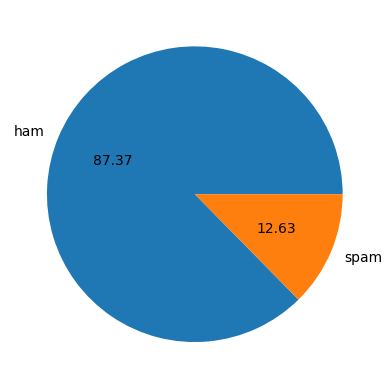

In [203]:
plt.pie(df['Traget'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show

In [52]:
#Data is imbalanced.

In [204]:
! pip install nltk

In [205]:
import nltk

In [206]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [207]:
df['num_characters']=df['text'].apply(len)

In [208]:
df.head()

,Traget,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [209]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [210]:
df.head()

,Traget,text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [211]:
df['num_Sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [212]:
df.head()

,Traget,text,num_characters,num_word,num_Sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [215]:
df[['num_characters','num_word','num_Sentence']].describe()

,num_characters,num_word,num_Sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [216]:
#for ham
df[df['Traget']==0][['num_characters','num_word','num_Sentence']].describe()

,num_characters,num_word,num_Sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [217]:
#for Spam
df[df['Traget']==1][['num_characters','num_word','num_Sentence']].describe()

,num_characters,num_word,num_Sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [51]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

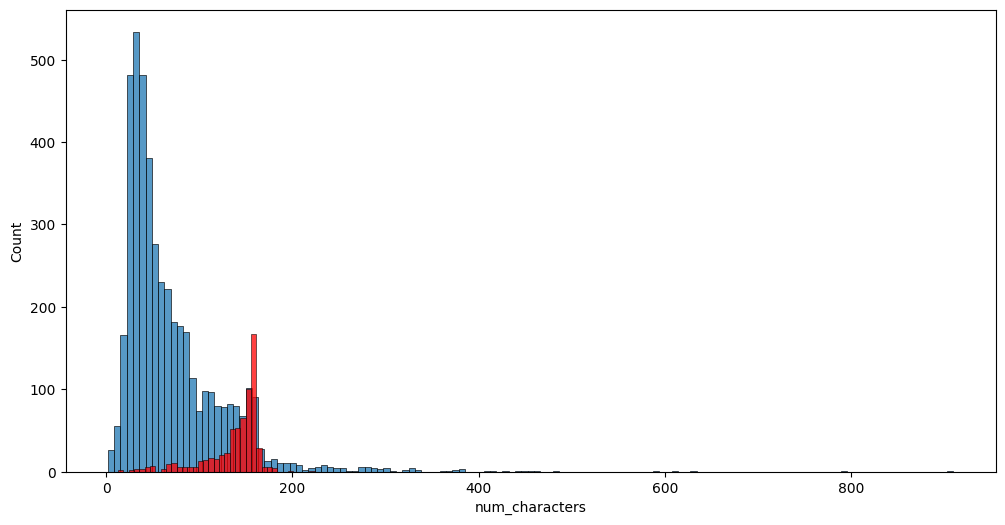

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Traget']==0]['num_characters'])
sns.histplot(df[df['Traget']==1]['num_characters'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

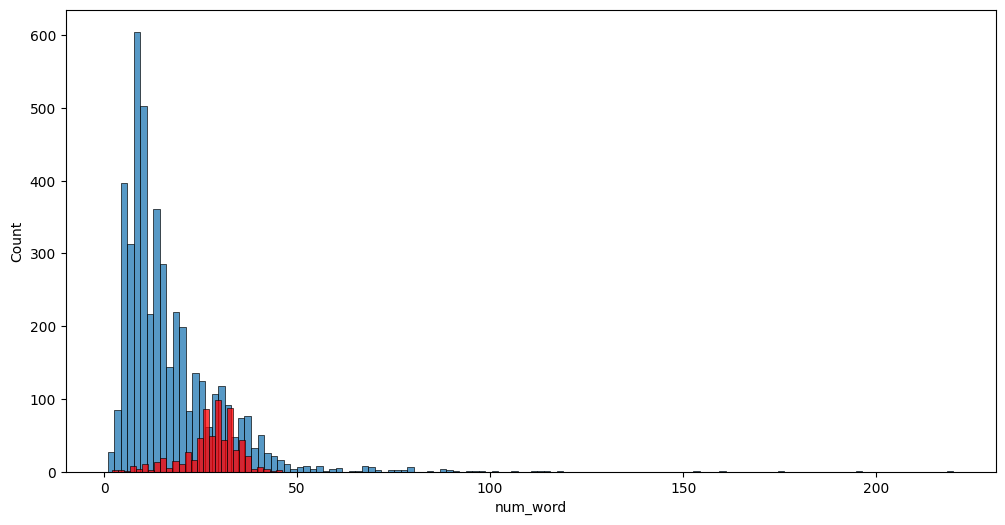

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Traget']==0]['num_word'])
sns.histplot(df[df['Traget']==1]['num_word'],color='red')

<Axes: xlabel='num_Sentence', ylabel='Count'>

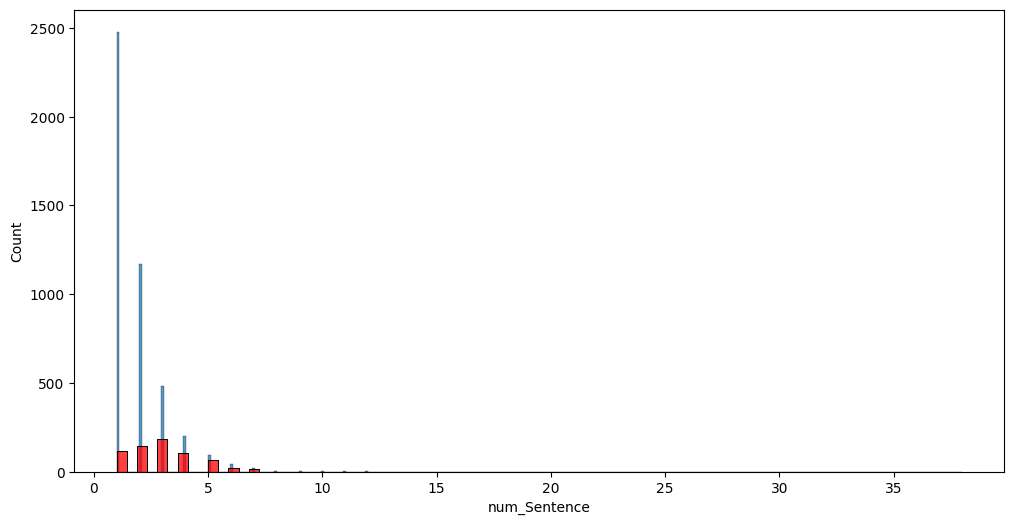

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Traget']==0]['num_Sentence'])
sns.histplot(df[df['Traget']==1]['num_Sentence'],color='red')

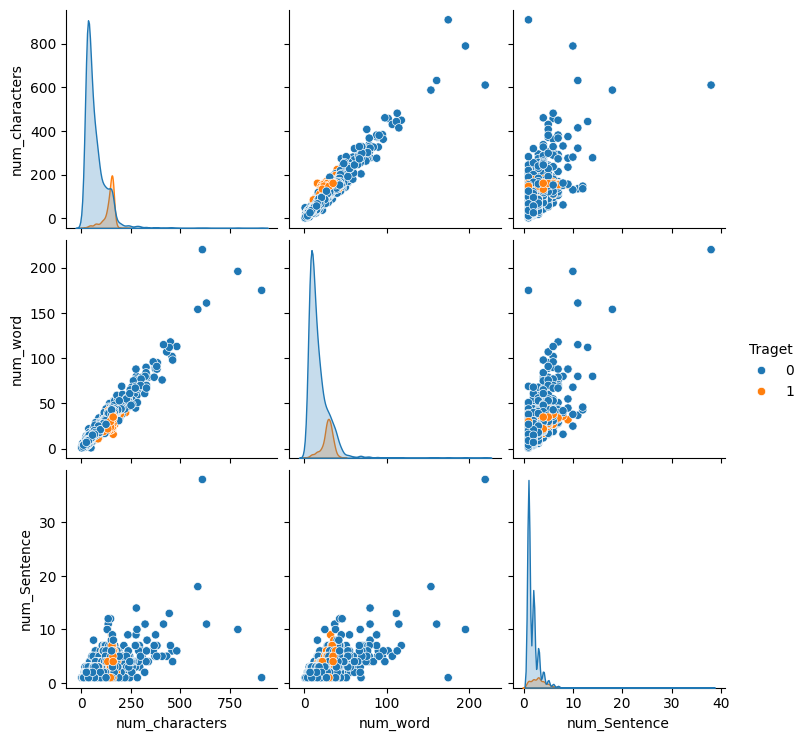

In [218]:
sns.pairplot(df,hue='Traget')

<ipython-input-219-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

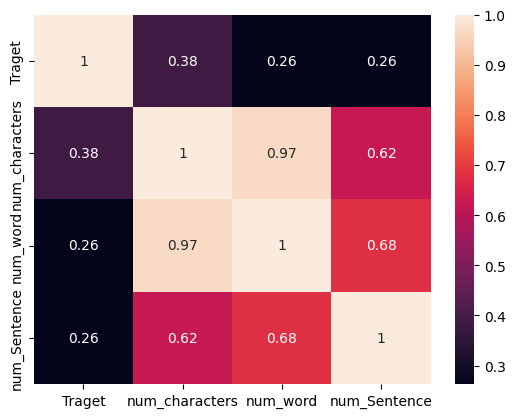

In [219]:
sns.heatmap(df.corr(),annot=True)

In [57]:
# form correlation matrix
matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                  Traget  num_characters  num_word  num_Sentence
Traget          1.000000        0.384717  0.262912      0.263939
num_characters  0.384717        1.000000  0.965760      0.624139
num_word        0.262912        0.965760  1.000000      0.679971
num_Sentence    0.263939        0.624139  0.679971      1.000000


<ipython-input-57-38580a22f64b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


In [58]:
#3.Data Preprocessing
#Lower case
#Tokenization
#Removing Special Characters
#Removing stop word and punctuation
#Stemming and lemitization

In [228]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transferm_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
          y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [229]:
transferm_text("Ravi Pratap Singh&Running2 Your is ?")

'ravi pratap singh running2'

In [230]:
df['transfered_text']=df['text'].apply(transferm_text)

In [231]:
df.head()

,Traget,text,num_characters,num_word,num_Sentence,transfered_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [232]:
from wordcloud import WordCloud

In [233]:
wc=WordCloud(width=500,height=500 ,min_font_size=12,background_color='red')

In [234]:
spam_ws=wc.generate(df[df['Traget']==1]['transfered_text'].str.cat(sep=" "))

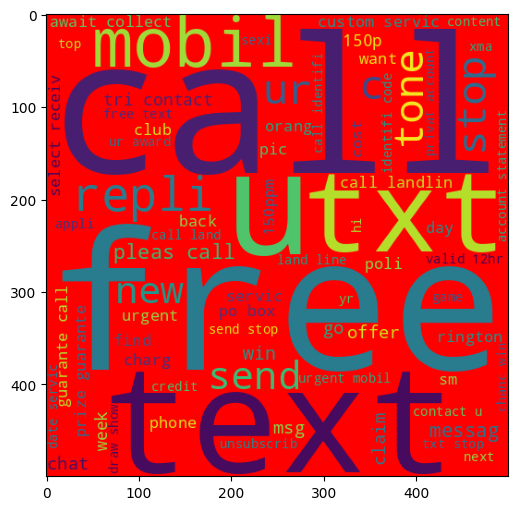

In [235]:
plt.figure(figsize=(10,6))
plt.imshow(spam_ws)

In [236]:
ham_ws=wc.generate(df[df['Traget']==0]['transfered_text'].str.cat(sep=" "))

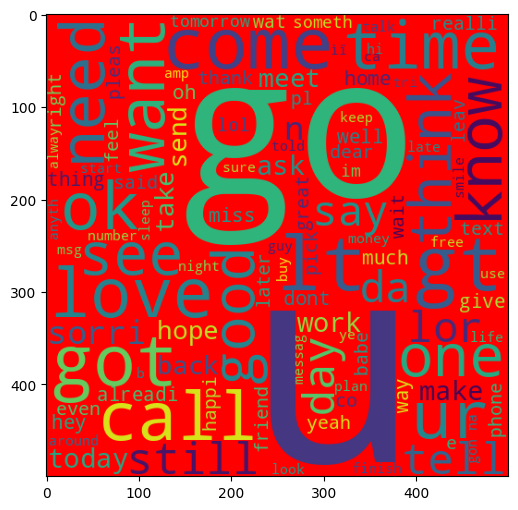

In [128]:
plt.figure(figsize=(10,6))
plt.imshow(ham_ws)

In [129]:
df.head()

,Traget,text,Unnamed: 4,num_characters,num_word,num_Sentence,transfered_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15,1,nah think goe usf live around though


In [130]:
spam_Courpus=[]
for msg in df[df['Traget']==1]['transfered_text'].tolist():
    for word in msg.split():
        spam_Courpus.append(word)


In [131]:
len(spam_Courpus)

9939

In [132]:
from collections import Counter

In [151]:
pd.DataFrame(Counter(spam_Courpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [157]:
ham_Courpus=[]
for msg in df[df['Traget']==0]['transfered_text'].tolist():
    for word in msg.split():
        ham_Courpus.append(word)

In [158]:
len(ham_Courpus)

35404

In [159]:
pd.DataFrame(Counter(ham_Courpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [160]:
#4.Vectorization Model Building

In [161]:
df.head()

,Traget,text,Unnamed: 4,num_characters,num_word,num_Sentence,transfered_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,61,15,1,nah think goe usf live around though


In [162]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [163]:
x=cv.fit_transform(df['transfered_text']).toarray()

In [164]:
x.shape

(5169, 6708)

In [167]:
y=df['Traget'].values

In [168]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [169]:
from sklearn.model_selection import train_test_split


In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [173]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [179]:
gnb.fit(x_train,y_train)
y_prid1=gnb.predict(x_test)
print(accuracy_score(y_test,y_prid1))
print(precision_score(y_test,y_prid1))
print(confusion_matrix(y_test,y_prid1))

0.8800773694390716
0.5315315315315315
[[792 104]
 [ 20 118]]


In [180]:
mnb.fit(x_train,y_train)
y_prid2=mnb.predict(x_test)
print(accuracy_score(y_test,y_prid2))
print(precision_score(y_test,y_prid2))
print(confusion_matrix(y_test,y_prid2))

0.9642166344294004
0.8344370860927153
[[871  25]
 [ 12 126]]


In [181]:
bnb.fit(x_train,y_train)
y_prid3=bnb.predict(x_test)
print(accuracy_score(y_test,y_prid3))
print(precision_score(y_test,y_prid3))
print(confusion_matrix(y_test,y_prid3))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]
